<a href="https://colab.research.google.com/github/KevinTheRainmaker/ML_DL_Basics/blob/master/HonGong_ML_DL/14_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주성분 분석

### **키워드:** 차원 축소, 주성분 분석, 설명된 분산

차원 축소에 대해 이해하고 대표적인 차원 축소 알고리즘인 PCA 모델을 사용해보자.

In [ ]:
# packages
import numpy as np

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

## 차원과 차원 축소

머신러닝에서 차원(dimension)이란, 데이터가 가진 특성을 의미한다. 정형 데이터에서는 학습에 이용되는 컬럼의 수, 이미지 데이터에서는 이미지의 픽셀 수 등이 그 예이다.

데이터의 특성 중 일부 특성만을 선택하면 데이터의 크기를 줄이는 동시에 지도학습의 성능을 향상시킬 수 있다. 이러한 기법을 차원 축소(dimensionality reduction)라고 하며 대표적으로 주성분 분석(principal component analysis)가 있다.

## 주성분 분석


주성분 분석은 데이터에 있는 분산이 큰 방향을 찾는 것으로 이해할 수 있다. 2차원 데이터에서, 분산이 큰 방향으로 데이터가 분포된 선은 두 개의 벡터로 표현할 수 있는데 이러한 벡터를 주성분이라고 한다.

주성분 벡터는 원본 데이터 내 특정 방향을 나타내며 이는 원본 데이터의 특성 갯수와 같다. 각각의 샘플 데이터는 인접 주성분에 직각으로 투영되는 방식으로 차원 축소가 진행된다.

첫번째 주성분과 두번째 주성분은 수직을 이루며, 전체 특성의 갯수와 주성분의 갯수가 같아질 때까지 같은 방법으로 반복된다.

다만, 샘플의 갯수가 데이터 득성보다 적을 경우 데이터 샘플 갯수까지만 주성분 탐색이 가능하다.

## PCA

In [ ]:
!wget https://bit.ly/fruits_300 -O fruits_300.npy
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2021-12-22 09:38:27--  https://bit.ly/fruits_300
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy [following]
--2021-12-22 09:38:27--  https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy [following]
--2021-12-22 09:38:28--  https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443..

PCA 클래스 객체를 만들 때 `n_components` 매개변수에 주성분의 개수를 지정할 수 있다.

In [ ]:
pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

PCA 클래스가 찾은 주성분은 `components_` 속성에 저장되어 있다.

In [ ]:
print(pca.components_.shape)
print(pca.components_)

(50, 10000)
[[ 9.24490195e-06  5.10601298e-06  8.91640398e-06 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.69701621e-05 -1.13551050e-05 -1.82152568e-05 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [-3.65220479e-05 -2.08401733e-05 -2.89870133e-05 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 ...
 [-4.52047600e-06  3.34757535e-05  1.14804934e-05 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [ 9.61626931e-05 -3.51976885e-05 -2.43237657e-05 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [ 7.18643678e-06  1.14712515e-04  1.27936382e-04 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [ ]:
def draw_fruits(arr, ratio=1):
  n = len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10
  fig, axis = plt.subplots(rows, cols,
                           figsize=(cols*ratio, rows*ratio), squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:
        axis[i,j].imshow(arr[i*10 + j], cmap='gray_r')
      axis[i,j].axis('off')
  plt.show()

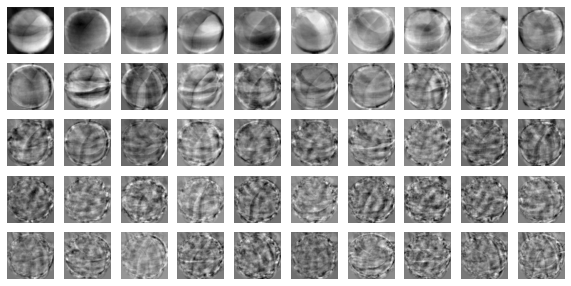

In [ ]:
draw_fruits(pca.components_.reshape(-1,100,100))

위 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것이다. 주성분을 찾았으니 원본 데이터를 여기에 투영하여 특성의 갯수를 10,000개에서 50개로 줄일 수 있다.

In [ ]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


## 원본 데이터 재구성

데이터의 차원을 줄였으니 이를 복구해보도록 하자.

In [ ]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


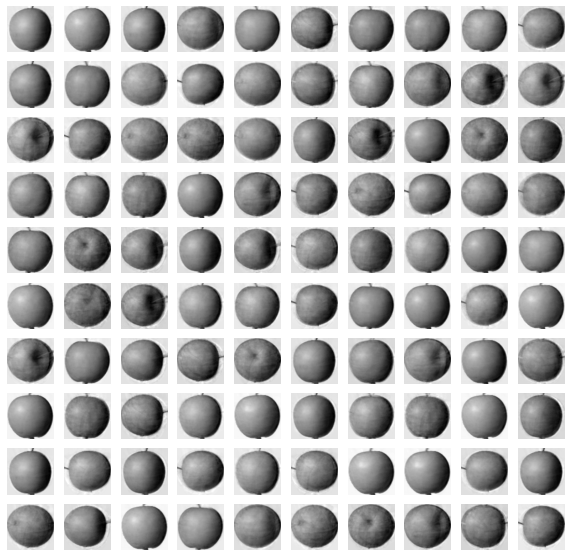

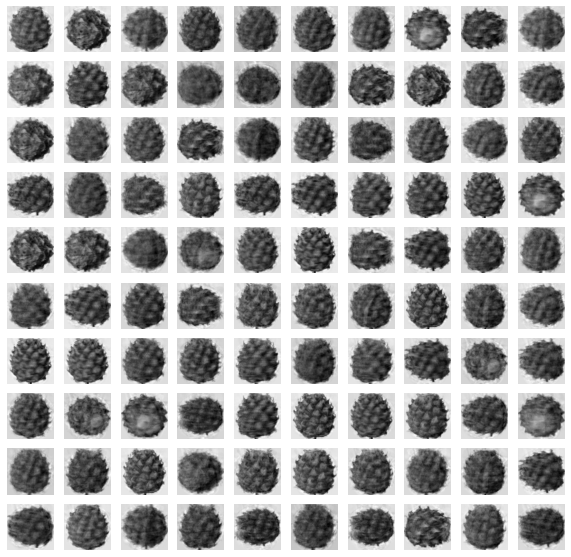

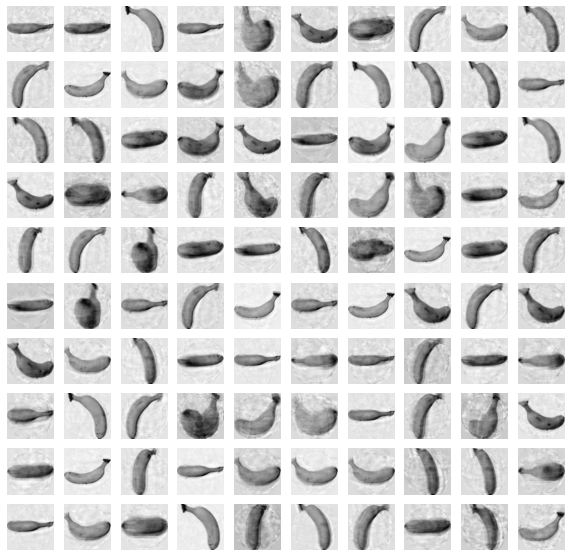

In [ ]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)

for start in [0,100,200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print('\n')

약간의 손실은 있지만 특성을 200배 줄였다가 복원한 것을 감안하면 준수하게 복원되었음을 확인할 수 있다.

## 설명된 분산

축소된 50개의 특성은 분산을 얼마나 보존하고 있을지 알아보자. 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값을 설명된 분산(explained variance)이라고 한다.

PCA 클래스의 설명된 분산 비율은 `explained_variance_ratio_` 속성에 기록되어 있다. 첫 번째 주성분의 분산이 가장 크고, 모든 분산 비율을 모두 더하면 50갸 주성분으로 표현되는 총 분산의 비율을 알 수 있다.

In [ ]:
print(np.sum(pca.explained_variance_ratio_))

0.9216007477874884


약 92%의 분산이 보존 되어있다.

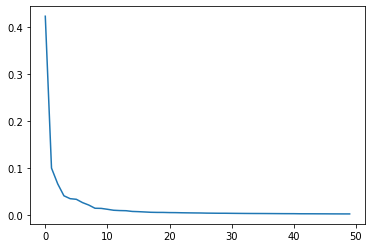

In [ ]:
plt.plot(pca.explained_variance_ratio_)

앞쪽 15개의 주성분이 대부분의 분산을 표현하고 있다.

In [ ]:
pca = PCA(n_components=15)
pca.fit(fruits_2d)
print(np.sum(pca.explained_variance_ratio_))

0.8146399102631524


## 다른 알고리즘과 함께 사용

원본데이터와 PCA로 축소된 데이터를 지도학습에 적용해보고 둘의 차이를 살펴보자

In [ ]:
lr = LogisticRegression()
target = np.array([0]*100 + [1]*100 + [2]*100)

In [ ]:
scores_raw = cross_validate(lr, fruits_2d, target)
print(np.mean(scores_raw['test_score']))
print(np.mean(scores_raw['fit_time']))

0.9966666666666667
2.429037618637085


In [ ]:
scores_pca = cross_validate(lr, fruits_pca, target)
print(np.mean(scores_pca['test_score']))
print(np.mean(scores_pca['fit_time']))

1.0
0.05027012825012207


특성을 줄였음에도 정확도가 100%로 올라갔으며 학습 시간은 50배 가량 줄었다.

위에서 PCA 객체를 만들 때 `n_components`에 주성분의 개수를 입력했는데, 그 대신 설명된 분산의 비율을 지정할 수도 있다.

In [ ]:
pca = PCA(n_components=0.7)
pca.fit(fruits_2d)
print(pca.n_components_)

7


단 7개의 특성으로 설명된 분산 70%를 보존할 수 있다.

In [ ]:
fruits_pca_70 = pca.transform(fruits_2d)
scores_pca_70 = cross_validate(lr, fruits_pca_70, target)
print(np.mean(scores_pca_70['test_score']))
print(np.mean(scores_pca_70['fit_time']))

1.0
0.031559419631958005


7개만으로도 100%를 달성하였다.